<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/Seattle/Regresi%C3%B3n%20Lineal/Coeficientes/Tabla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("Seattle_Outliers_categorizacion.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,"[""Keypad"", ""Refrigerator"", ""Patio or balcony"",...",...,(37 - 45%) Medio,(2) Verificación moderada,2,(0 - 1) Una cama,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,"[""Rice maker"", ""Shared patio or balcony"", ""Ref...",...,(92 - 100%) Excelente,(2) Verificación moderada,4,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,(74 - 82%) Muy bueno,(2) Verificación moderada,4,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,(74 - 82%) Muy bueno,(2) Verificación moderada,4,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,"[""Smart lock"", ""Refrigerator"", ""Patio or balco...",...,(37 - 45%) Medio,(2) Verificación moderada,2,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho


In [41]:
# Antes de dividir el dataframe, observamos los valores numéricos de la columna catégorica "room_type"
df[["room_type","room_type_num"]].value_counts()

,,count
room_type,room_type_num,
Entire home/apt,0,5387
Private room,2,1024
Hotel room,1,21
Shared room,3,10


In [42]:
# Separamos los datos cuantitativos
df = df.select_dtypes(np.number)
df

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,reviews_per_month,price,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,14942,2009,90.0,44.0,0.0,4,1,1,47.654440,-122.336290,...,0.88,99.0,1.0,29.0,0,80,2,3,1936.04,2
1,30559,2009,98.0,98.0,1.0,10,1,1,47.550170,-122.319370,...,1.16,76.0,1.0,53.0,2,24,2,5,1486.26,4
2,31481,2009,100.0,80.0,1.0,2,1,1,47.554950,-122.386630,...,0.64,189.0,3.0,63.0,0,18,2,3,3696.08,4
3,31481,2009,100.0,80.0,1.0,2,1,1,47.556270,-122.386070,...,0.51,125.0,2.0,57.0,0,18,2,3,2444.50,4
4,14942,2009,90.0,44.0,0.0,4,1,1,47.656080,-122.336020,...,0.61,167.0,2.0,28.0,0,80,2,3,3265.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,398317720,2021,100.0,99.0,1.0,130,1,1,47.676760,-122.358820,...,1.78,481.0,6.0,45.0,0,57,3,3,9406.44,1
6438,184675574,2018,100.0,99.0,0.0,4,1,1,47.665714,-122.289243,...,1.78,82.0,1.0,17.0,2,10,3,5,1603.59,0
6439,584875397,2024,97.6,92.3,0.0,1,0,1,47.531331,-122.374214,...,1.78,222.0,2.0,37.0,0,67,3,3,4341.43,4
6440,581629893,2024,72.0,100.0,0.0,6,1,1,47.509680,-122.256950,...,1.78,40.0,1.0,47.0,2,62,3,3,782.24,4


## TABLA DE COEFICIENTES

## Entire Home

In [43]:
dfHome0 = df[df["room_type_num"] == 0]
dfHome0

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,reviews_per_month,price,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,14942,2009,90.0,44.0,0.0,4,1,1,47.654440,-122.336290,...,0.88,99.0,1.0,29.0,0,80,2,3,1936.04,2
2,31481,2009,100.0,80.0,1.0,2,1,1,47.554950,-122.386630,...,0.64,189.0,3.0,63.0,0,18,2,3,3696.08,4
3,31481,2009,100.0,80.0,1.0,2,1,1,47.556270,-122.386070,...,0.51,125.0,2.0,57.0,0,18,2,3,2444.50,4
4,14942,2009,90.0,44.0,0.0,4,1,1,47.656080,-122.336020,...,0.61,167.0,2.0,28.0,0,80,2,3,3265.85,2
5,102684,2010,100.0,100.0,1.0,1,1,1,47.679470,-122.371960,...,6.12,94.0,2.0,40.0,0,85,3,3,1838.26,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,107434423,2016,99.0,97.0,0.0,4673,1,1,47.601869,-122.316473,...,1.78,156.0,1.0,32.0,0,47,3,3,3050.74,2
6435,245843895,2019,100.0,99.0,1.0,2,1,1,47.643094,-122.354017,...,1.78,179.0,1.0,35.0,0,55,3,3,3500.52,1
6437,398317720,2021,100.0,99.0,1.0,130,1,1,47.676760,-122.358820,...,1.78,481.0,6.0,45.0,0,57,3,3,9406.44,1
6439,584875397,2024,97.6,92.3,0.0,1,0,1,47.531331,-122.374214,...,1.78,222.0,2.0,37.0,0,67,3,3,4341.43,4


In [44]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
dfHome0 = dfHome0.drop("room_type_num", axis = 1)
corrTabla1 = abs(dfHome0.corr())
corrTabla1

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
host_id,1.000000,0.952201,0.038217,0.017693,0.069815,0.060072,0.163203,0.069837,0.026829,0.020995,...,0.190662,0.067991,0.116058,0.062789,0.005355,0.000684,0.081594,0.018421,0.116058,0.081499
host_since,0.952201,1.000000,0.030790,0.048178,0.060095,0.025821,0.148149,0.080319,0.040281,0.014682,...,0.187200,0.082447,0.121549,0.064989,0.010596,0.017358,0.116884,0.022666,0.121549,0.088710
host_response_rate,0.038217,0.030790,1.000000,0.442421,0.155418,0.028366,0.019081,0.051287,0.035429,0.003868,...,0.064385,0.102575,0.013132,0.006350,0.128021,0.041500,0.606883,0.003168,0.013132,0.039874
host_acceptance_rate,0.017693,0.048178,0.442421,1.000000,0.248233,0.068337,0.008084,0.032569,0.038086,0.034732,...,0.157690,0.242685,0.051286,0.044177,0.167861,0.055194,0.548794,0.009199,0.051286,0.054999
host_is_superhost,0.069815,0.060095,0.155418,0.248233,1.000000,0.300784,0.066341,0.034107,0.014307,0.037651,...,0.311137,0.318827,0.062002,0.087152,0.303996,0.038575,0.201510,0.018167,0.062002,0.054213
host_listings_count,0.060072,0.025821,0.028366,0.068337,0.300784,1.000000,0.029437,0.079624,0.023605,0.000409,...,0.212536,0.141352,0.063222,0.148469,0.245381,0.004571,0.095187,0.013032,0.063222,0.012072
host_has_profile_pic,0.163203,0.148149,0.019081,0.008084,0.066341,0.029437,1.000000,0.114133,0.045127,0.023838,...,0.045457,0.030430,0.006956,0.012532,0.013224,0.003892,0.010206,0.004636,0.006956,0.058694
host_identity_verified,0.069837,0.080319,0.051287,0.032569,0.034107,0.079624,0.114133,1.000000,0.012191,0.022130,...,0.011137,0.026889,0.050687,0.013925,0.035819,0.014444,0.053359,0.002285,0.050687,0.034171
latitude,0.026829,0.040281,0.035429,0.038086,0.014307,0.023605,0.045127,0.012191,1.000000,0.111912,...,0.012513,0.042016,0.015915,0.005238,0.032920,0.137866,0.076847,0.030687,0.015915,0.587953
longitude,0.020995,0.014682,0.003868,0.034732,0.037651,0.000409,0.023838,0.022130,0.111912,1.000000,...,0.034227,0.051727,0.002081,0.047874,0.069334,0.129081,0.026515,0.007211,0.002081,0.001810


<Axes: >

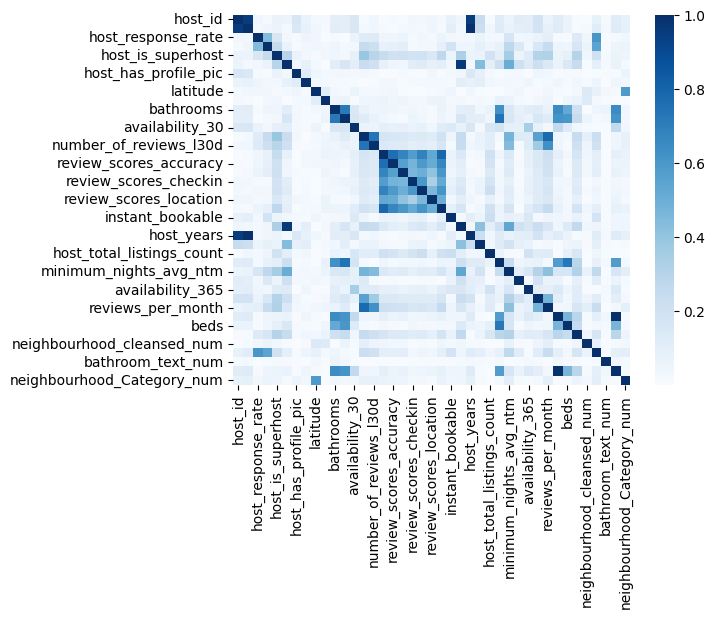

In [45]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(corrTabla1, cmap = 'Blues')
Heat_Map1

## Hotel Room

In [46]:
dfHotel1 = df[df["room_type_num"] == 1]
dfHotel1

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,reviews_per_month,price,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
1972,20493911,2014,100.0,100.0,1.0,8,1,1,47.612660,-122.346240,...,8.60,184.0,1.0,44.0,1,4,3,6,3598.30,2
4439,501999514,2023,95.0,99.0,0.0,2870,1,1,47.604224,-122.335789,...,0.11,192.0,1.0,22.0,1,12,3,3,3754.75,2
4971,501999514,2023,95.0,99.0,0.0,2870,1,1,47.605802,-122.335951,...,1.78,319.0,1.0,22.0,1,12,3,3,6238.36,2
4972,501999514,2023,95.0,99.0,0.0,2870,1,1,47.604297,-122.335789,...,1.78,192.0,1.0,22.0,1,12,3,3,3754.75,2
4973,501999514,2023,95.0,99.0,0.0,2870,1,1,47.605370,-122.335660,...,0.17,319.0,2.0,22.0,1,12,3,3,6238.36,2
4974,501999514,2023,95.0,99.0,0.0,2870,1,1,47.605531,-122.335663,...,1.78,319.0,4.0,22.0,1,12,3,3,6238.36,2
4975,501999514,2023,95.0,99.0,0.0,2870,1,1,47.605720,-122.336230,...,1.78,319.0,2.0,22.0,1,12,3,3,6238.36,2
5968,25138314,2014,92.0,94.0,0.0,786,1,1,47.614650,-122.335650,...,1.78,197.0,1.0,19.0,1,4,3,3,3852.53,2
5969,25138314,2014,92.0,94.0,0.0,786,1,1,47.613151,-122.335880,...,1.78,197.0,1.0,19.0,1,12,3,3,3852.53,2
5971,25138314,2014,92.0,94.0,0.0,786,1,1,47.613950,-122.335800,...,1.78,197.0,2.0,19.0,1,4,3,3,3852.53,2


In [47]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
dfHotel1 = dfHotel1.drop("room_type_num", axis = 1)
corrTabla2 = abs(dfHotel1.corr())
corrTabla2

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
host_id,1.000000,0.998406,0.438356,0.726604,0.140451,0.929162,NaN,NaN,0.959600,0.073113,...,0.138796,0.288443,0.651318,0.066412,0.071726,0.580604,NaN,0.140451,0.651318,NaN
host_since,0.998406,1.000000,0.426839,0.704172,0.126674,0.908409,NaN,NaN,0.947721,0.047242,...,0.125022,0.275101,0.686299,0.080037,0.077985,0.540138,NaN,0.126674,0.686299,NaN
host_response_rate,0.438356,0.426839,1.000000,0.895177,0.735864,0.348358,NaN,NaN,0.536295,0.636491,...,0.736796,0.612647,0.101442,0.173486,0.879448,0.402754,NaN,0.735864,0.101442,NaN
host_acceptance_rate,0.726604,0.704172,0.895177,1.000000,0.359176,0.722469,NaN,NaN,0.819030,0.269409,...,0.360513,0.216468,0.192300,0.145474,0.578430,0.695080,NaN,0.359176,0.192300,NaN
host_is_superhost,0.140451,0.126674,0.735864,0.359176,1.000000,0.348565,NaN,NaN,0.090757,0.946795,...,0.999995,0.951623,0.005752,0.121506,0.968299,0.234521,NaN,1.000000,0.005752,NaN
host_listings_count,0.929162,0.908409,0.348358,0.722469,0.348565,1.000000,NaN,NaN,0.941251,0.345705,...,0.347062,0.472238,0.397222,0.003797,0.112206,0.776444,NaN,0.348565,0.397222,NaN
host_has_profile_pic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.959600,0.947721,0.536295,0.819030,0.090757,0.941251,NaN,NaN,1.000000,0.068618,...,0.089050,0.246464,0.460526,0.002121,0.140275,0.708359,NaN,0.090757,0.460526,NaN
longitude,0.073113,0.047242,0.636491,0.269409,0.946795,0.345705,NaN,NaN,0.068618,1.000000,...,0.946823,0.897845,0.158451,0.052348,0.902812,0.353342,NaN,0.946795,0.158451,NaN


<Axes: >

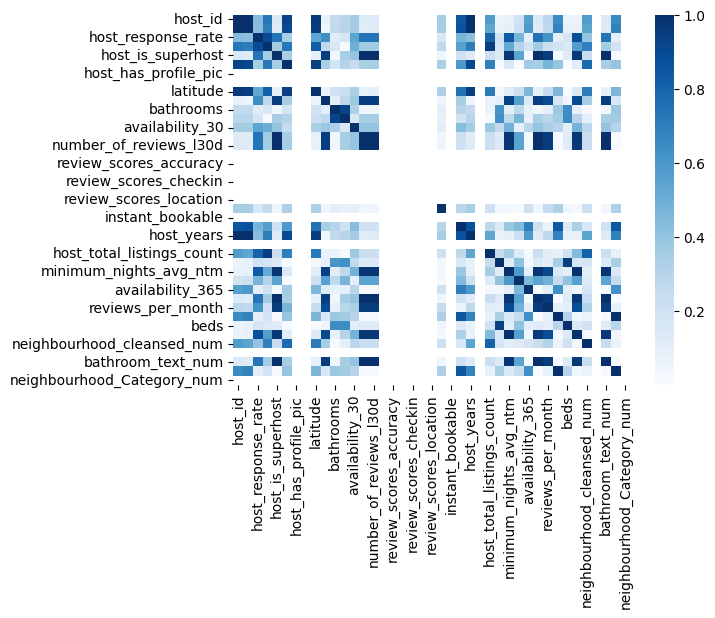

In [48]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(corrTabla2, cmap = 'Blues')
Heat_Map2

## Private Room

In [49]:
dfPrivate2 = df[df["room_type_num"] == 2]
dfPrivate2

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,reviews_per_month,price,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
1,30559,2009,98.0,98.0,1.0,10,1,1,47.550170,-122.319370,...,1.16,76.0,1.0,53.0,2,24,2,5,1486.26,4
9,2438665,2012,100.0,100.0,0.0,4,1,1,47.700850,-122.367000,...,0.62,52.0,2.0,48.0,2,14,2,5,1016.91,2
10,209571,2010,100.0,97.0,1.0,1,1,1,47.661330,-122.400880,...,2.45,67.0,1.0,30.0,2,36,3,5,1310.25,2
11,30559,2009,98.0,98.0,1.0,10,1,1,47.549710,-122.317530,...,1.81,69.0,1.0,42.0,2,24,2,3,1349.36,4
24,1025723,2011,100.0,98.0,1.0,2,1,1,47.600020,-122.327420,...,5.76,144.0,1.0,39.0,2,34,3,4,2816.06,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,159991679,2017,100.0,100.0,0.0,1,1,0,47.515970,-122.376410,...,1.78,68.0,1.0,25.0,2,2,3,5,1329.81,3
6425,28379912,2015,100.0,100.0,0.0,11,1,1,47.676560,-122.326830,...,1.78,55.0,1.0,46.0,2,25,2,5,1075.58,3
6436,529119042,2023,100.0,98.0,0.0,35,1,1,47.602287,-122.300789,...,1.78,59.0,1.0,17.0,2,42,3,3,1153.80,0
6438,184675574,2018,100.0,99.0,0.0,4,1,1,47.665714,-122.289243,...,1.78,82.0,1.0,17.0,2,10,3,5,1603.59,0


In [50]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
dfPrivate2 = dfPrivate2.drop("room_type_num", axis = 1)
corrTabla3 = abs(dfPrivate2.corr())
corrTabla3

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
host_id,1.000000,0.960590,0.043136,0.049654,0.326612,0.232631,0.019829,0.029002,0.089319,0.011031,...,0.335030,0.071162,0.131955,0.003558,0.247137,0.117436,0.105316,0.299419,0.131955,0.245737
host_since,0.960590,1.000000,0.046490,0.017624,0.311304,0.226641,0.030239,0.000092,0.094604,0.005395,...,0.348255,0.065717,0.131130,0.002898,0.223722,0.089225,0.117068,0.282269,0.131130,0.244634
host_response_rate,0.043136,0.046490,1.000000,0.421356,0.138067,0.033854,0.024169,0.025885,0.001573,0.000886,...,0.091226,0.069385,0.048022,0.001728,0.000014,0.072065,0.709800,0.031586,0.048022,0.043837
host_acceptance_rate,0.049654,0.017624,0.421356,1.000000,0.269091,0.021584,0.050206,0.025290,0.026095,0.006666,...,0.203908,0.199530,0.079738,0.017324,0.115135,0.047064,0.520053,0.092336,0.079738,0.101133
host_is_superhost,0.326612,0.311304,0.138067,0.269091,1.000000,0.239181,0.054378,0.032659,0.015460,0.053626,...,0.385836,0.177082,0.084390,0.005666,0.173457,0.044132,0.118685,0.174276,0.084390,0.099148
host_listings_count,0.232631,0.226641,0.033854,0.021584,0.239181,1.000000,0.022745,0.078208,0.035582,0.053825,...,0.085313,0.104443,0.117569,0.077662,0.045139,0.027495,0.104109,0.069866,0.117570,0.007785
host_has_profile_pic,0.019829,0.030239,0.024169,0.050206,0.054378,0.022745,1.000000,0.335410,0.060306,0.088599,...,0.053832,0.078914,0.037180,0.092305,0.037918,0.053343,0.027412,0.083398,0.037180,0.091017
host_identity_verified,0.029002,0.000092,0.025885,0.025290,0.032659,0.078208,0.335410,1.000000,0.025566,0.016349,...,0.018405,0.043591,0.003514,0.055845,0.022048,0.072265,0.007316,0.016739,0.003514,0.082092
latitude,0.089319,0.094604,0.001573,0.026095,0.015460,0.035582,0.060306,0.025566,1.000000,0.290535,...,0.067389,0.023640,0.023441,0.037919,0.140918,0.109405,0.012866,0.026153,0.023441,0.630581
longitude,0.011031,0.005395,0.000886,0.006666,0.053626,0.053825,0.088599,0.016349,0.290535,1.000000,...,0.006690,0.095751,0.020982,0.033473,0.008643,0.001996,0.025605,0.065737,0.020982,0.065439


<Axes: >

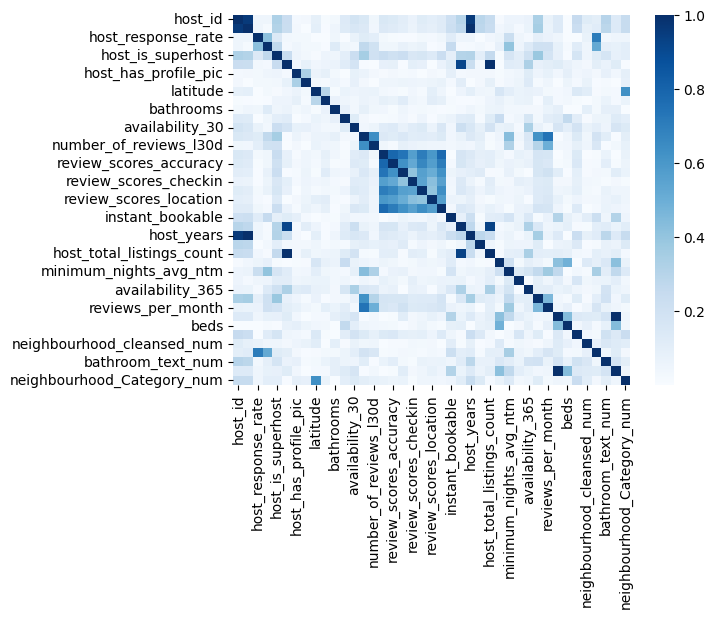

In [51]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map3 = sns.heatmap(corrTabla3, cmap = 'Blues')
Heat_Map3

## Shared Room

In [52]:
dfShared3 = df[df["room_type_num"] == 3]
dfShared3

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,reviews_per_month,price,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
964,85076667,2016,100.0,100.0,1.0,13,1,1,47.663250,-122.352150,...,0.12,69.0,1.0,12.0,3,21,3,5,1349.36,2
971,85076667,2016,100.0,100.0,1.0,13,1,1,47.661250,-122.352460,...,0.26,58.0,2.0,40.0,3,21,3,5,1134.25,2
1363,85076667,2016,100.0,100.0,1.0,13,1,1,47.669690,-122.361500,...,0.15,43.0,2.0,27.0,3,83,3,5,840.91,2
1548,31751507,2015,100.0,100.0,0.0,5,1,1,47.609960,-122.339000,...,2.00,35.0,2.0,17.0,3,12,3,5,684.46,2
2123,31751507,2015,100.0,100.0,0.0,5,1,1,47.607750,-122.338630,...,2.47,84.0,2.0,17.0,3,12,3,5,1642.70,2
3014,442656014,2022,0.0,92.3,0.0,1,0,0,47.674138,-122.266272,...,1.78,150.0,1.0,8.0,3,86,0,5,2933.40,1
4441,31751507,2015,100.0,100.0,0.0,5,1,1,47.609334,-122.338562,...,2.77,45.0,2.0,17.0,3,12,3,5,880.02,2
4924,485859922,2022,0.0,20.0,0.0,1,1,1,47.616941,-122.337531,...,0.10,100.0,2.0,11.0,3,4,0,5,1955.60,2
4994,3147600,2012,100.0,93.0,1.0,4,1,1,47.625479,-122.299162,...,0.43,110.0,1.0,75.0,3,75,1,5,2151.16,2
6097,570077559,2024,100.0,100.0,0.0,1,1,1,47.657860,-122.341500,...,1.00,133.0,0.0,29.0,3,80,1,5,2600.95,2


In [53]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
dfShared3 = dfShared3.drop("room_type_num", axis = 1)
corrTabla3 = abs(dfShared3.corr())
corrTabla3

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
host_id,1.000000,0.978501,6.661342e-01,0.499024,0.470257,0.598085,0.409710,0.409710,0.329042,0.277332,...,0.523741,0.176658,0.730961,5.301971e-01,0.324230,0.320647,7.850337e-01,NaN,0.730962,0.409710
host_since,0.978501,1.000000,6.323697e-01,0.426089,0.505342,0.507888,0.421580,0.421580,0.372787,0.181515,...,0.440704,0.110091,0.632439,4.613120e-01,0.474205,0.254743,6.594849e-01,NaN,0.632440,0.421580
host_response_rate,0.666134,0.632370,1.000000e+00,0.725667,0.408248,0.532988,0.666667,0.666667,0.113049,0.567748,...,0.381361,0.084148,0.561736,5.296073e-17,0.416940,0.065866,7.905694e-01,NaN,0.561736,0.666667
host_acceptance_rate,0.499024,0.426089,7.256666e-01,1.000000,0.266093,0.407617,0.024907,0.024907,0.262394,0.055694,...,0.298060,0.339204,0.234702,2.054652e-01,0.207047,0.295443,6.087319e-01,NaN,0.234702,0.024907
host_is_superhost,0.470257,0.505342,4.082483e-01,0.266093,1.000000,0.793569,0.272166,0.272166,0.474400,0.260326,...,0.350921,0.709964,0.275410,0.000000e+00,0.568820,0.229784,3.227486e-01,NaN,0.275410,0.272166
host_listings_count,0.598085,0.507888,5.329878e-01,0.407617,0.793569,1.000000,0.355325,0.355325,0.393204,0.608516,...,0.031821,0.416628,0.661555,3.271600e-01,0.095641,0.126155,7.435833e-01,NaN,0.661555,0.355325
host_has_profile_pic,0.409710,0.421580,6.666667e-01,0.024907,0.272166,0.355325,1.000000,1.000000,0.436151,0.816701,...,0.259285,0.224393,0.595820,2.484520e-01,0.304349,0.453078,5.270463e-01,NaN,0.595821,1.000000
host_identity_verified,0.409710,0.421580,6.666667e-01,0.024907,0.272166,0.355325,1.000000,1.000000,0.436151,0.816701,...,0.259285,0.224393,0.595820,2.484520e-01,0.304349,0.453078,5.270463e-01,NaN,0.595821,1.000000
latitude,0.329042,0.372787,1.130490e-01,0.262394,0.474400,0.393204,0.436151,0.436151,1.000000,0.079334,...,0.624069,0.519480,0.294064,4.556372e-01,0.018236,0.639420,1.324318e-01,NaN,0.294065,0.436151
longitude,0.277332,0.181515,5.677484e-01,0.055694,0.260326,0.608516,0.816701,0.816701,0.079334,1.000000,...,0.237305,0.250765,0.712591,3.454100e-01,0.121426,0.448979,6.826579e-01,NaN,0.712591,0.816701


<Axes: >

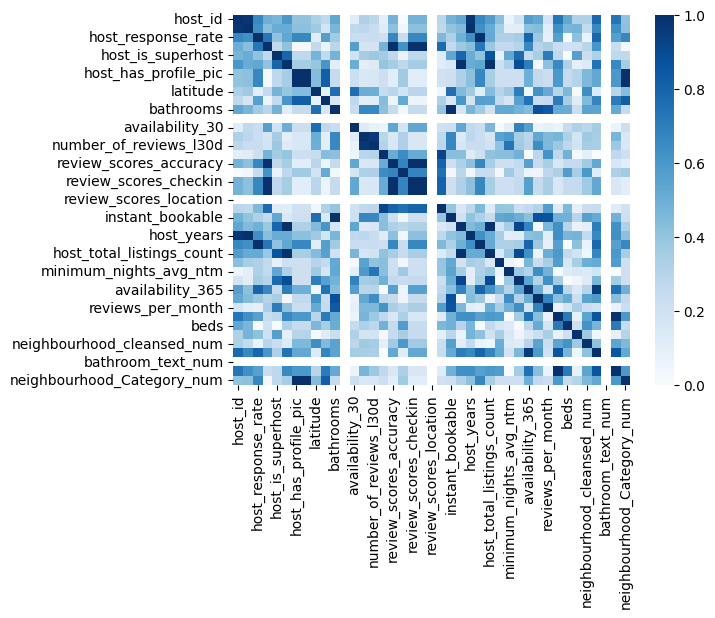

In [54]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map3 = sns.heatmap(corrTabla3, cmap = 'Blues')
Heat_Map3